##Part I: Multiple Linear Regression

###1. Data Understanding, Cleaning and Transformation:

Understand what is data about and why do you think the data was collected, and what research questions
data can answers.

(a) You can explain your logic in the text cell of your notebook.

(b) Based on your research questions Identify Dependent and Independent Variables.

(c) Use pandas to load your dataset and observe the data.
If required perform basic data cleaning and Transformation the way you fits your task requirements.

In [ ]:
#importing drive contents to collab

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#linking csv file with notebook

data_path1 = "/content/drive/MyDrive/final/wine regression.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#importing required modules

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['figure.figsize'] = (10.0, 10.0)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA


In [ ]:
#reading csv file

df1 = pd.read_csv(data_path1)

In [ ]:
df1.info()
print(df1.isnull().sum())
print(df1.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
fixed acidity           0
volatile acidity        0
citric acid            

In [ ]:
# splitting the dataset columns into independent and dependent variables
# independent = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'id']
# dependent = ['quality']



In [ ]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# df1.corr()
df1['total acidity'] = (df1['fixed acidity'] + df1['volatile acidity'] + df1['citric acid']) / 3
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,total acidity
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,2.700000
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,2.893333
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,2.866667
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,4.013333
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,2.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592,2.313333
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,2.500000
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,2.293333
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,2.183333


In [ ]:
# statistical summary
# df1_selected = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')
df1.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,total acidity
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379,3.036938
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116,0.613907
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000,1.756667
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000,2.620000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000,2.913333
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000,3.328333
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000,5.681667


###2. Data Analysis and Visualization:

Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make various plots to generate insights from dataset. To generate better insights from the data make visualization and plot of your Independent variable against
Dependent variable.

In [ ]:
df1.shape

(1143, 14)

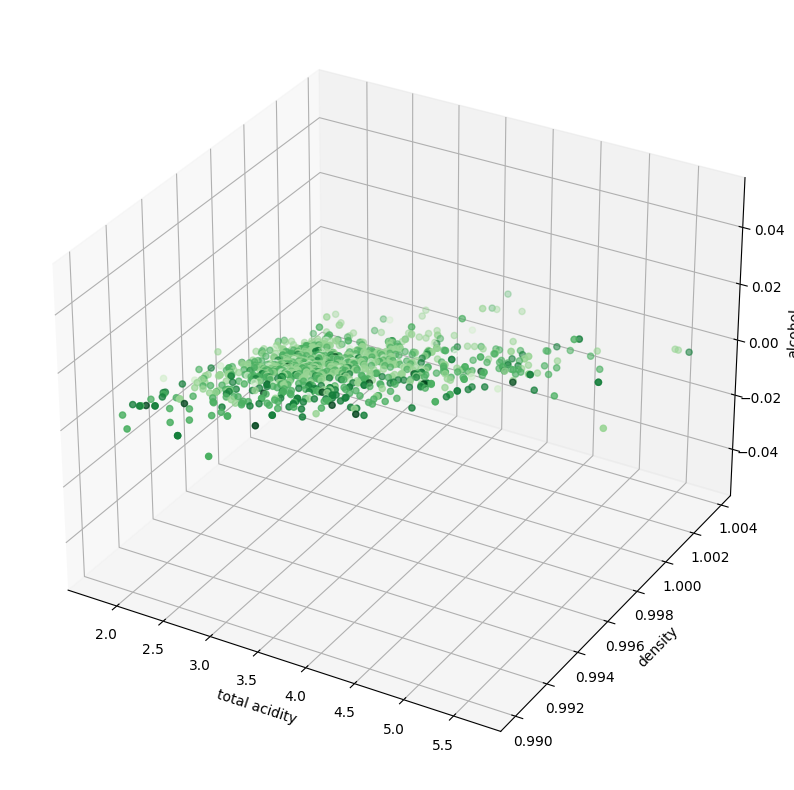

In [ ]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
# fix_acid = df1["fixed acidity"]
# vol_acid = df1["volatile acidity"]
# cit_acid = df1["citric acid"]
acidity = df1["total acidity"]
density = df1["density"]
alcohol = df1["alcohol"]
quality = df1["quality"]

ax.scatter(acidity, density,  c = quality, cmap = 'Greens')

ax.set_xlabel('total acidity')
ax.set_ylabel('density')
ax.set_zlabel('alcohol')

plt.show()


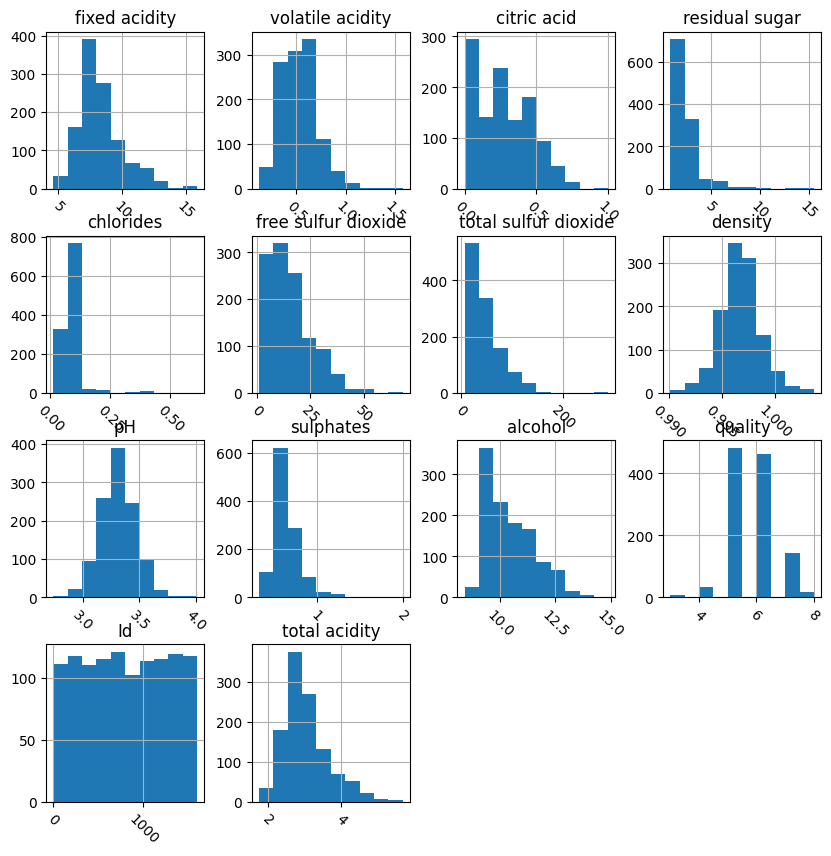

In [ ]:
df1.hist(xrot=-45,figsize=(10,10))
plt.show()

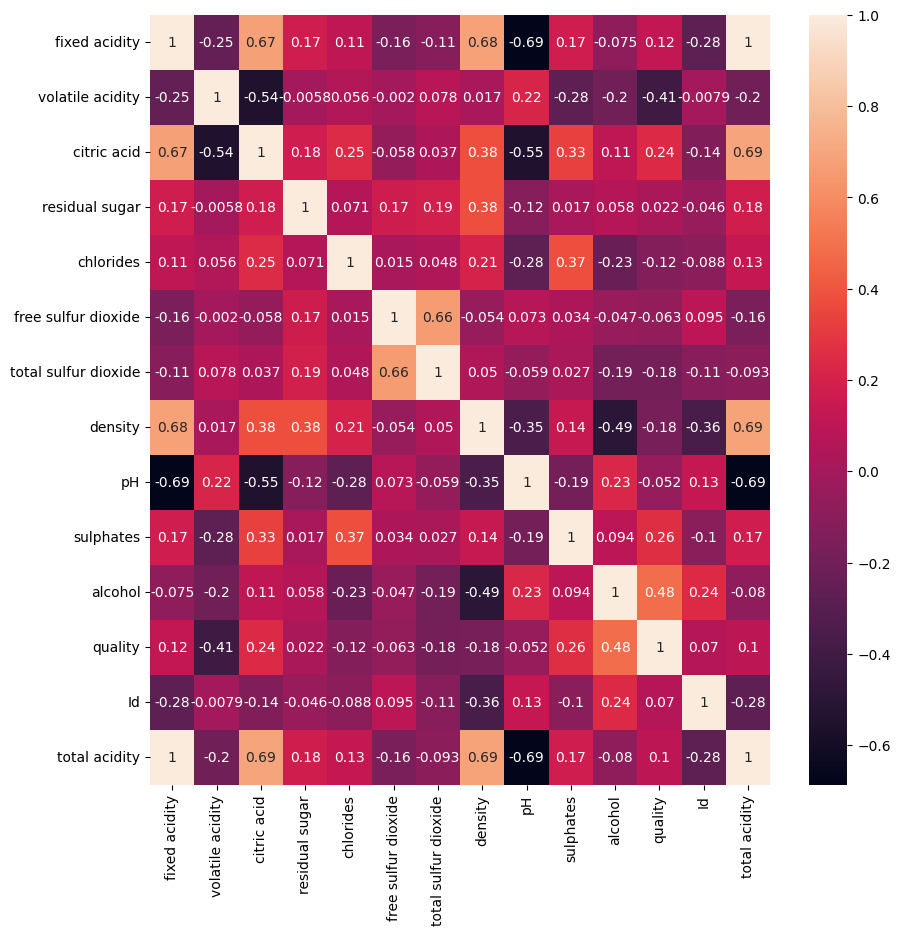

In [ ]:
corr1 = df1.corr()
sns.heatmap(corr1, annot=True)
plt.show()

In [ ]:
sns.pairplot(df1)

###3. Build Primary Model [Multiple Linear Regression]:

Once you have cleaned, transformed and Visualize your data build Multiple Linear Regression Model from
Scratch.


####Identifying depedent and independent variables and splitting data into training and ting sets


In [ ]:

x = df1.drop(df1[['quality']],axis = 1).to_numpy()
y = df1[['quality']].to_numpy().reshape(-1, 1)

In [ ]:
x1 = np.hstack((np.ones((x.shape[0], 1)), x))

# splitting data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y, train_size=0.3, random_state=0)

####Computing multiple linear regression

In [ ]:
def RMSProp(x,y,learning_rate = 0.01,decay_rate = 0.9,epsilon = 1e-10):

      # Initializing the parameter
    theta = np.zeros((x.shape[1], 1))
    # Initialize the moving average of squared gradient
    g2 = np.zeros((x.shape[1], 1))

    # Perform the optimization
    for i in range(15000000):
        # Compute the gradient
        y_pred = x.dot(theta)
        grad = x.T.dot(y_pred - y) / x.shape[0]

        # Update the moving average of squared gradient
        g2 = decay_rate * g2 + (1 - decay_rate) * grad**2

        # Update the parameters
        theta -= learning_rate * grad / (np.sqrt(g2) + epsilon)

    return y_pred,theta



In [ ]:

y_pred,w = RMSProp(x_train,y_train)


In [ ]:
#predicting for test data

y_pred_test = x_test.dot(w)

In [ ]:
df1=pd.DataFrame(data={'Predicted value':y_pred_test.flatten(),'Actual Value':y_test.flatten()})
df1.head(15)

,Predicted value,Actual Value
0,-2.001789,5
1,3.779689,4
2,-2.025581,6
3,0.707028,6
4,4.110861,5
5,-2.148959,6
6,4.572638,5
7,0.932925,6
8,-1.559727,6
9,4.423791,7


###4. Model Evaluation:

Pick an appropriate evaluation metric to evaluate your model on the test set.

In [ ]:

print("MAE", metrics.mean_absolute_error(y_train, y_pred))
print("MSE", metrics.mean_squared_error(y_train, y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
print("r2_score", metrics.r2_score(y_train, y_pred))


MAE 4.502015397921545
MSE 26.156723210505465
RMSE 5.114364399464069
r2_score -38.65617998643596


###5. Dimensionality Reduction:

Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced features,evaluate the model and Compare the output

In [ ]:
# standardizing values by subtracting mean and dividing by standard deviation

def standardize(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean) / std

In [ ]:
def reduce_dim(x):
    ''' Standardize the pixel values by subtracting the mean and dividing by the standard deviation
    Returns dataset with reduced features '''
    x_scaled =  standardize(x)
    # Create a PCA object
    pca = PCA(n_components=4)

    # Fit the PCA model to the input data
    pca.fit(x_scaled)

    # Transform the input data to the first two principal components
    x_pca = pca.transform(x_scaled)
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)
    x_original = x_pca * np.std(x) + np.mean(x)
    return x_original

####Computing multiple linear regression with new data

In [ ]:
x0 = reduce_dim(x)
x2 = np.hstack((np.ones((x0.shape[0], 1)), x0))

# splitting the data into training and test sets

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, train_size=0.3, random_state=0)

[9.94583449e-01 5.14062951e-03 2.47987259e-04 1.51130590e-05]


In [ ]:
y_pred2,w = RMSProp(x2_train,y2_train)


predicting for test data

In [ ]:
y_pred2_test = x2_test.dot(w)


In [ ]:
df1=pd.DataFrame(data={'Predicted value':y_pred2_test.flatten(),'Actual Value':y2_test.flatten()})
df1.head(15)

,Predicted value,Actual Value
0,6.992392,5
1,1.203857,4
2,6.747821,6
3,4.889681,6
4,1.070983,5
5,7.319482,6
6,-0.097888,5
7,4.397961,6
8,7.229701,6
9,2.217011,7


In [ ]:
df1=pd.DataFrame(data={'Predicted value with PCA':y_pred2.flatten(),'Without PCA':y_pred.flatten(),'Actual':y_train.flatten()})
df1

,Predicted value with PCA,Without PCA,Actual
0,9.476433,7.945901,7
1,7.223746,9.502825,6
2,3.575915,14.121352,5
3,9.127493,8.166641,6
4,9.292597,8.197671,4
...,...,...,...
337,4.007923,14.002601,7
338,5.843028,12.264073,6
339,5.256561,12.156473,5
340,7.019889,9.854648,5


Training metrics

In [ ]:

print("MAE", metrics.mean_absolute_error(y2_train, y_pred2))
print("MSE", metrics.mean_squared_error(y2_train, y_pred2))
print("RMSE",np.sqrt(metrics.mean_squared_error(y2_train,y_pred2)))
print("r2_score", metrics.r2_score(y2_train, y_pred2))


MAE 2.33894688756217
MSE 8.084645333210252
RMSE 2.843351074561538
r2_score -11.257122112739202


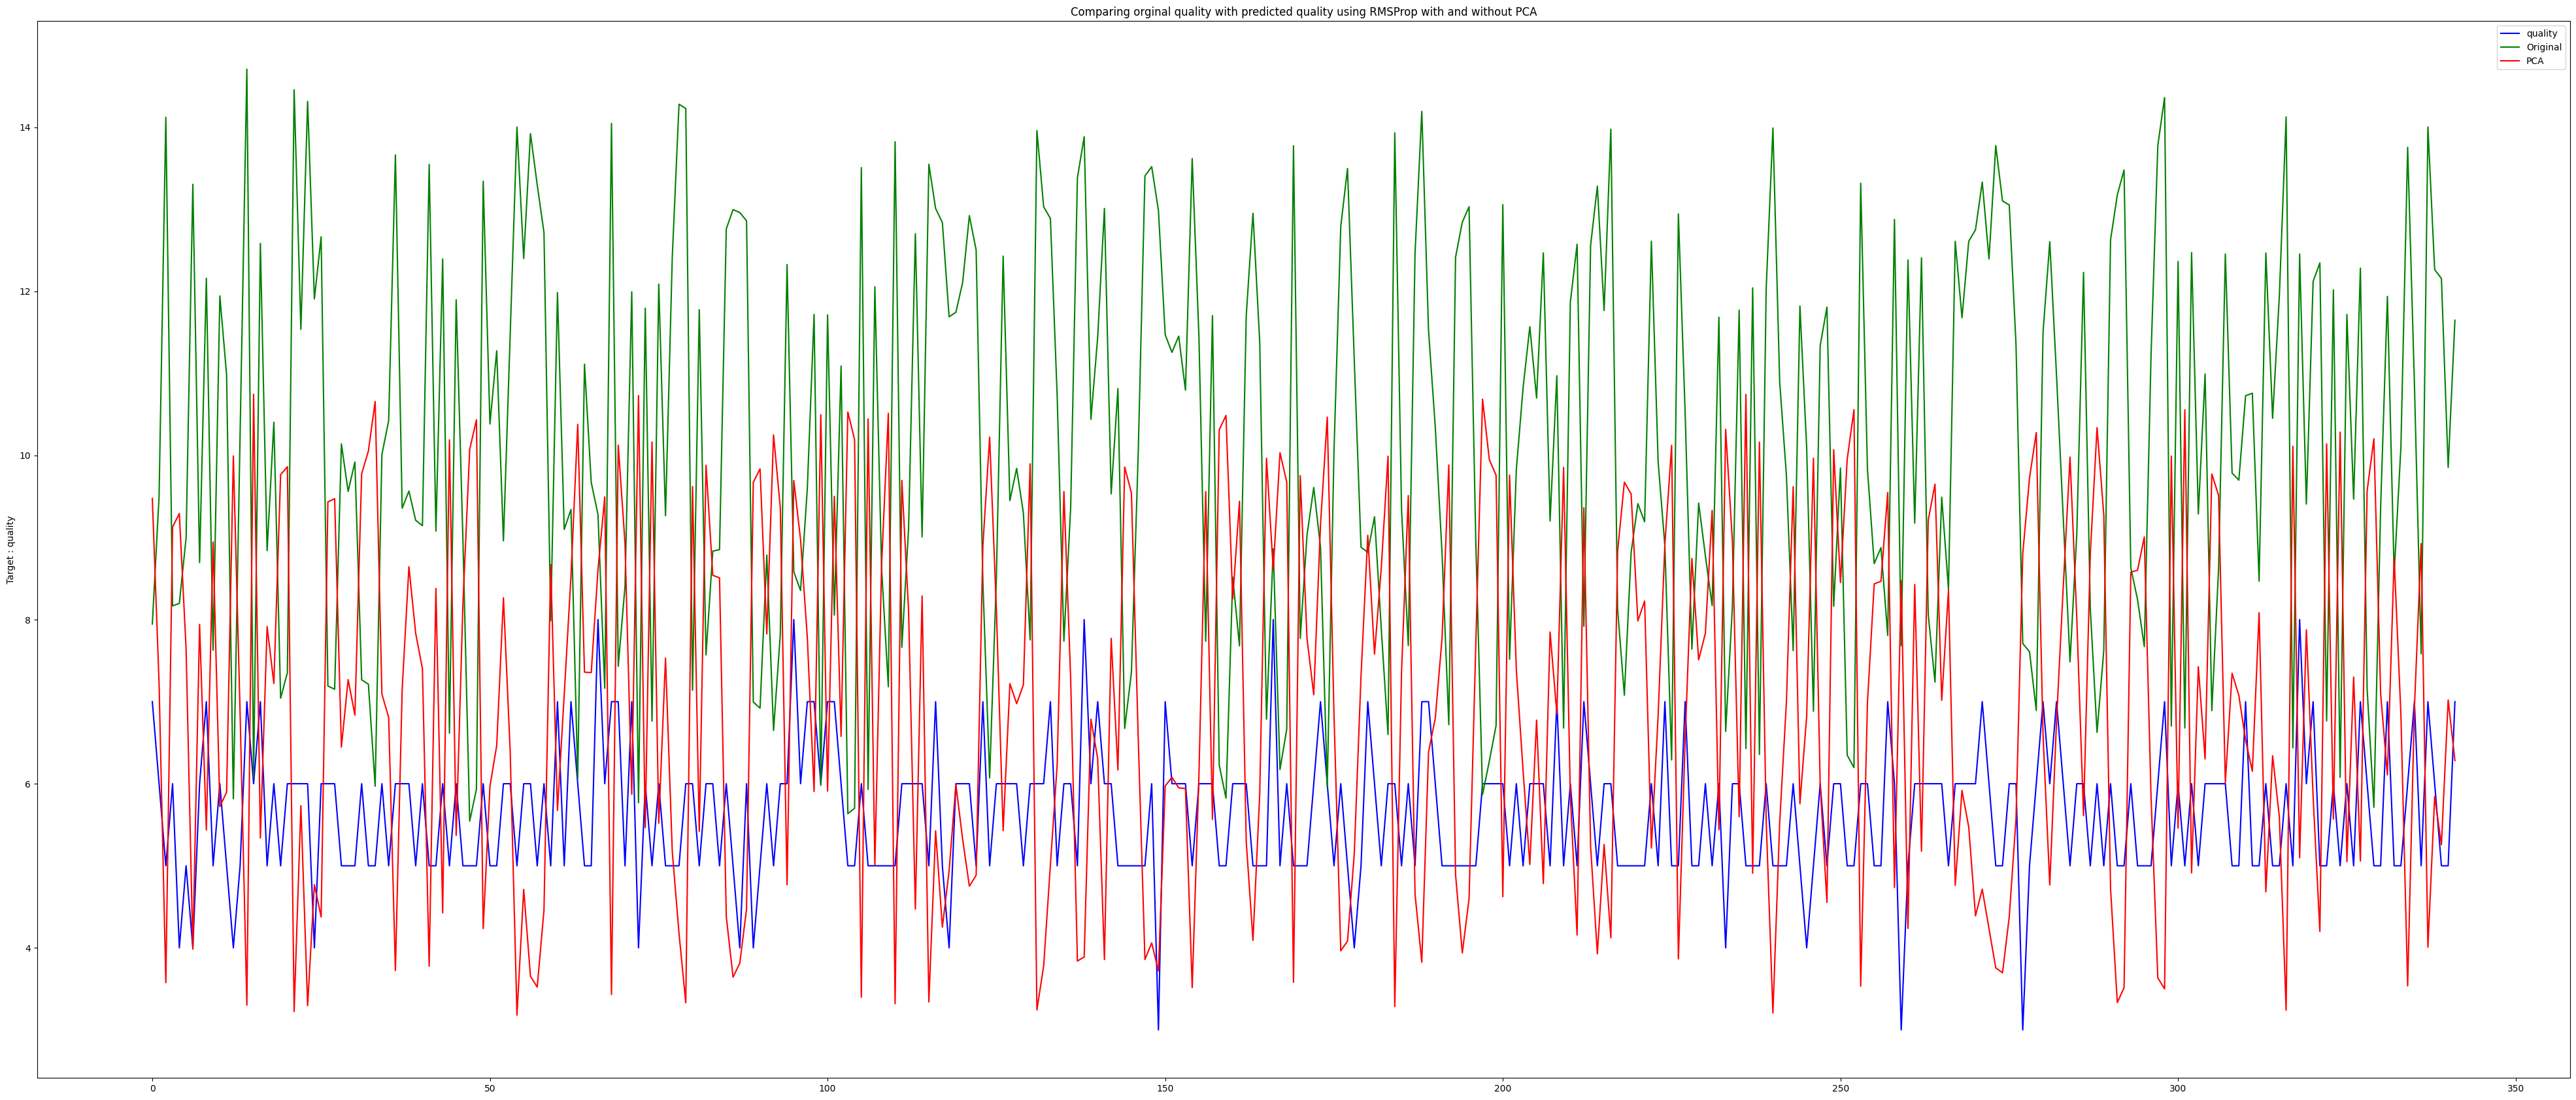

In [ ]:
plt.figure(num=None, figsize=(50, 21))
plt.plot(np.arange(342),y_train, color = "blue", label = 'quality')
plt.plot(np.arange(342),y_pred, color = "green", label = 'Original')
plt.plot(np.arange(342),y_pred2, color = "red", label = 'PCA')
plt.ylabel("Target : quality")
plt.title("Comparing orginal quality with predicted quality using RMSProp with and without PCA")
plt.legend()
plt.show()

###6. Conclusion:

Conclude the result of the comparison.


As a result, the findings from doing multilinear regression with and without PCA prior to training have shed light on how dimensionality reduction affects the performance of the model. The findings demonstrate that by using PCA before to training the multilinear regression model, model accuracy and computing efficiency can be improved. It is crucial to remember that the advantages of applying PCA in this way can differ depending on the particulars of the dataset and the intended application.


##Part II: Logistic Regression:


###1. Data Understanding, Cleaning and Transformation:

Understand what is data about and why do you think the data was collected, and what research questions
data can answers.

(a) You can explain your logic in the text cell of your notebook.

(b) Based on your research questions Identify Dependent and Independent Variables.

(c) Use pandas to load your dataset and observe the data. If required perform basic data cleaning and Transformation the way you fits your task requirements.


In [ ]:
#linking csv file with notebook

data_path2 = "/content/drive/MyDrive/final/classification diabetes.csv"

In [ ]:
# independent = [	'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# dependent = ['Outcome']



In [ ]:
df2 = pd.read_csv(data_path2)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df2.info()
print(df2.isnull().sum())
print(df2.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0


In [ ]:
df2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###2. Data Analysis and Visualization:

Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make various plots to generate insights from dataset.
To generate better insig

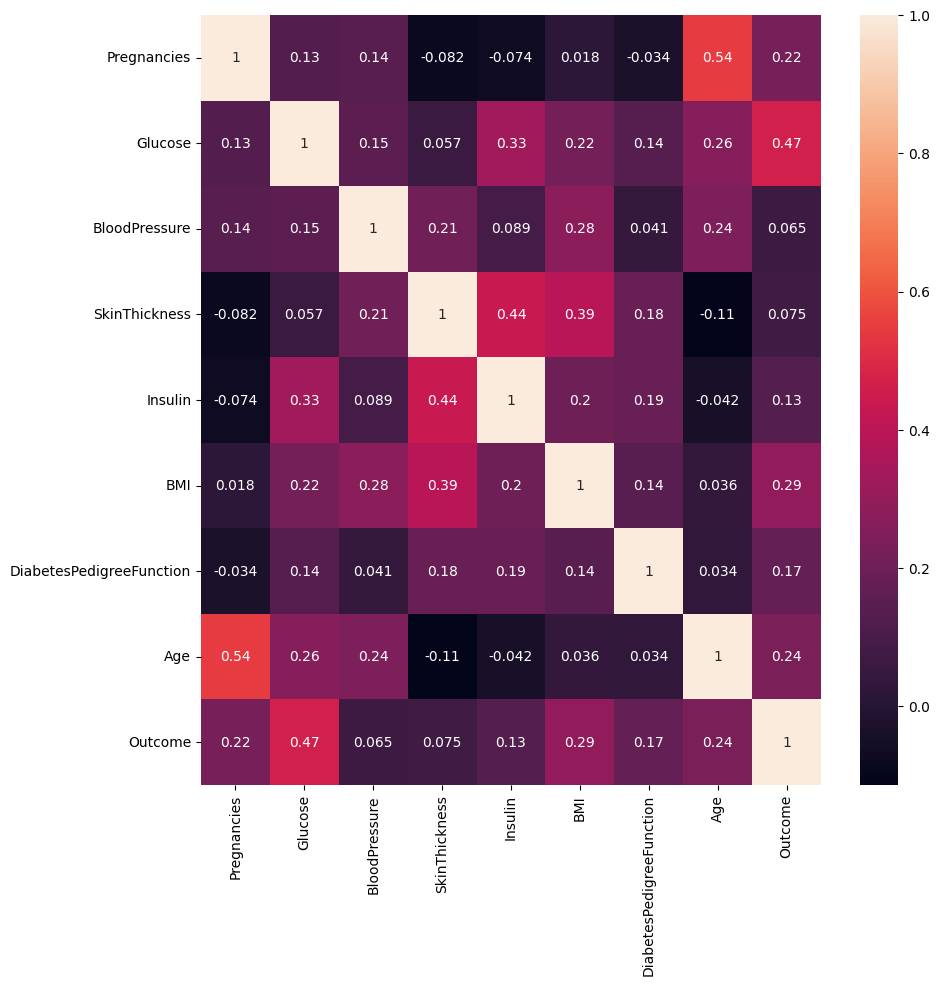

In [ ]:
corr2 = df2.corr()
sns.heatmap(corr2, annot=True)
plt.show()

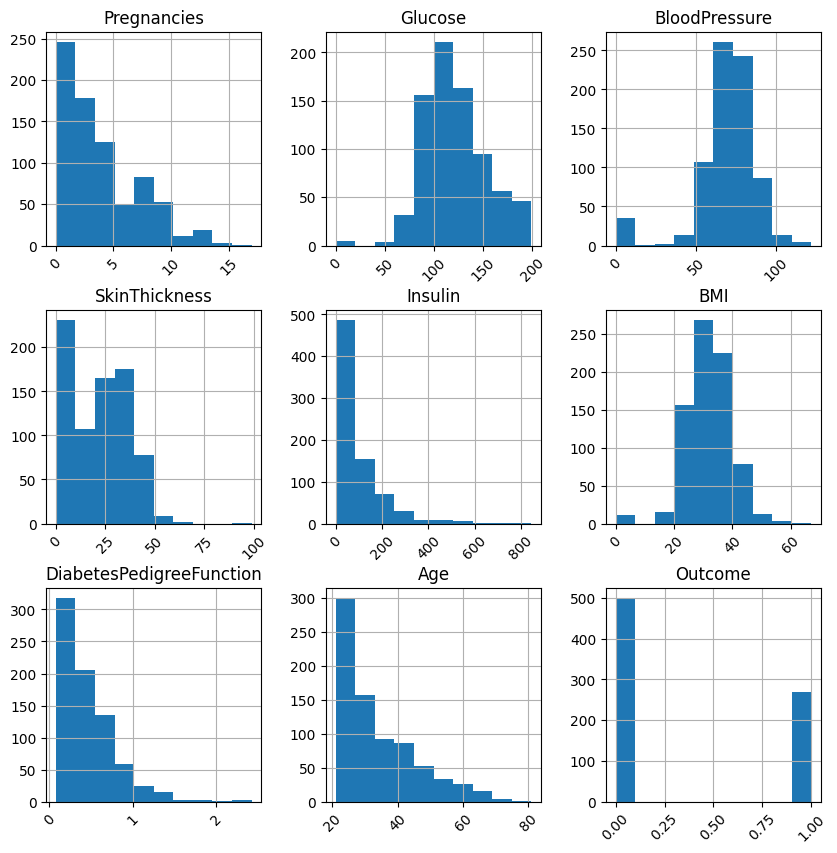

In [ ]:
df2.hist(xrot=45,figsize=(10,10))
plt.show()

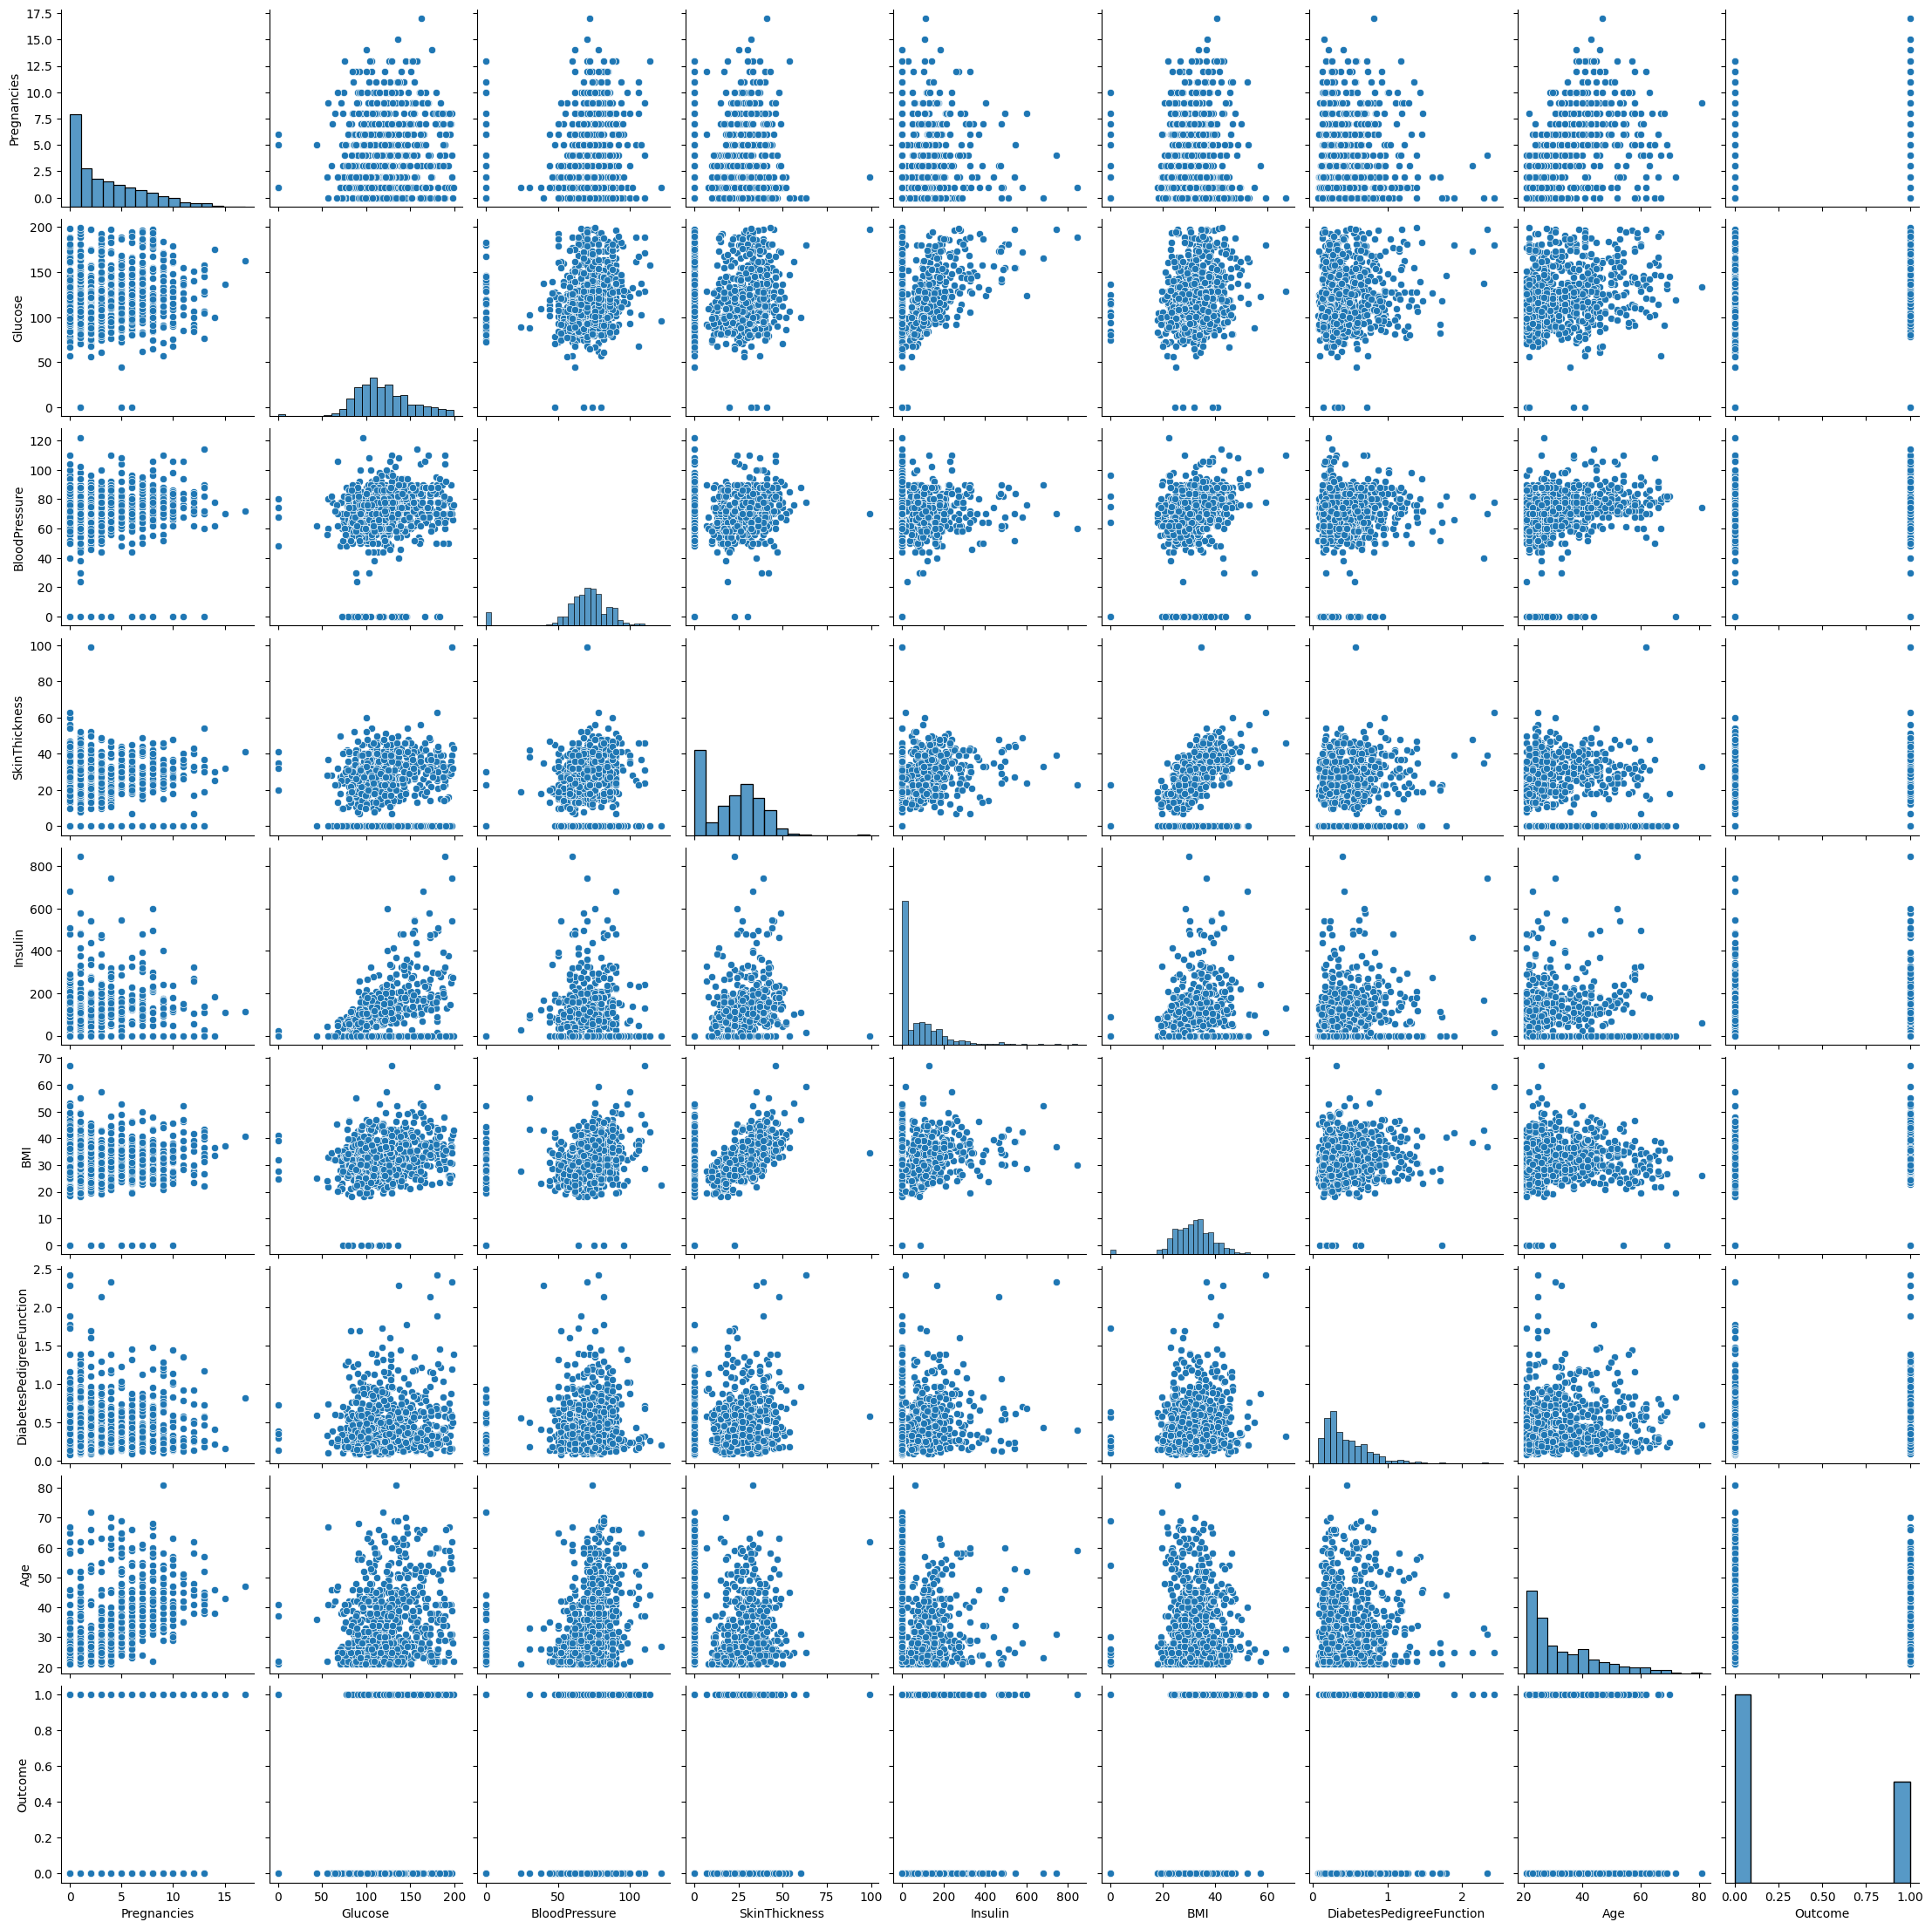

In [ ]:
sns.pairplot(df2)

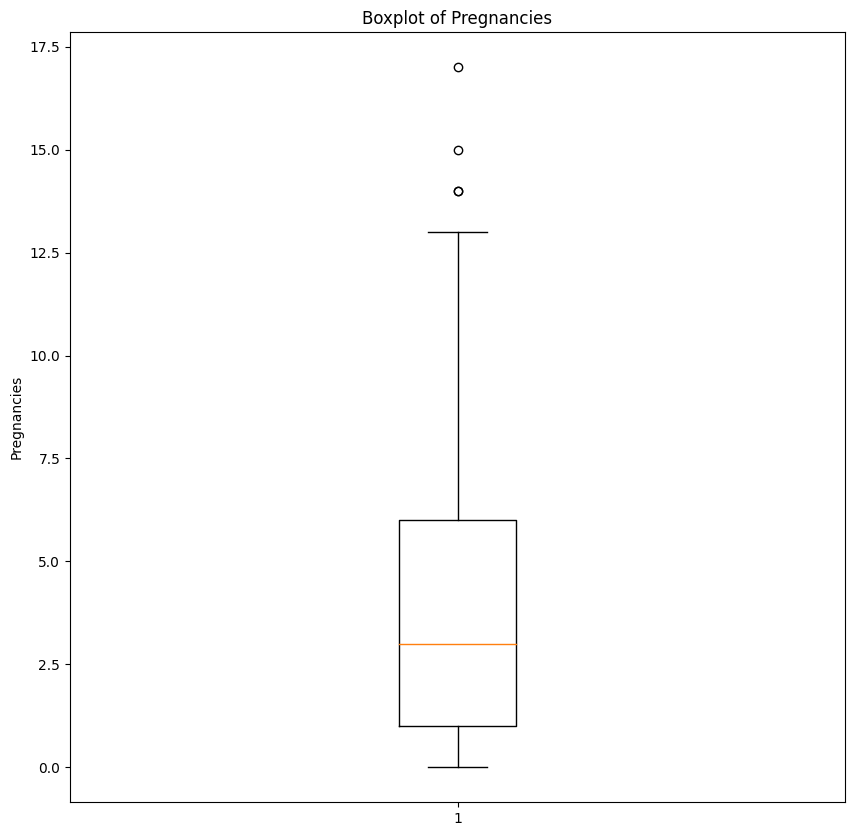

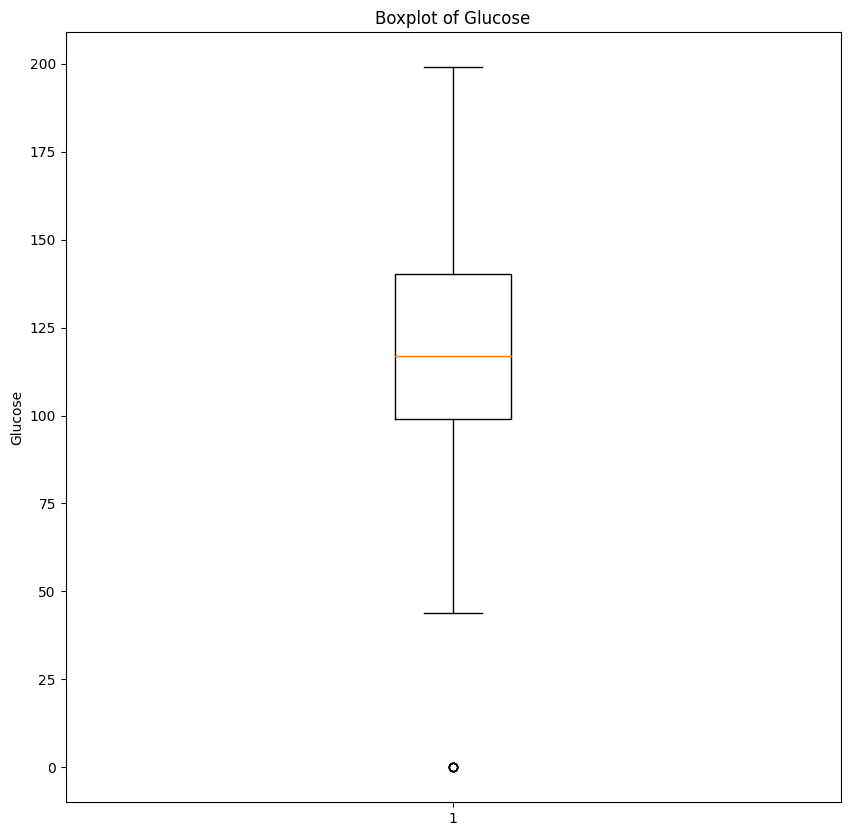

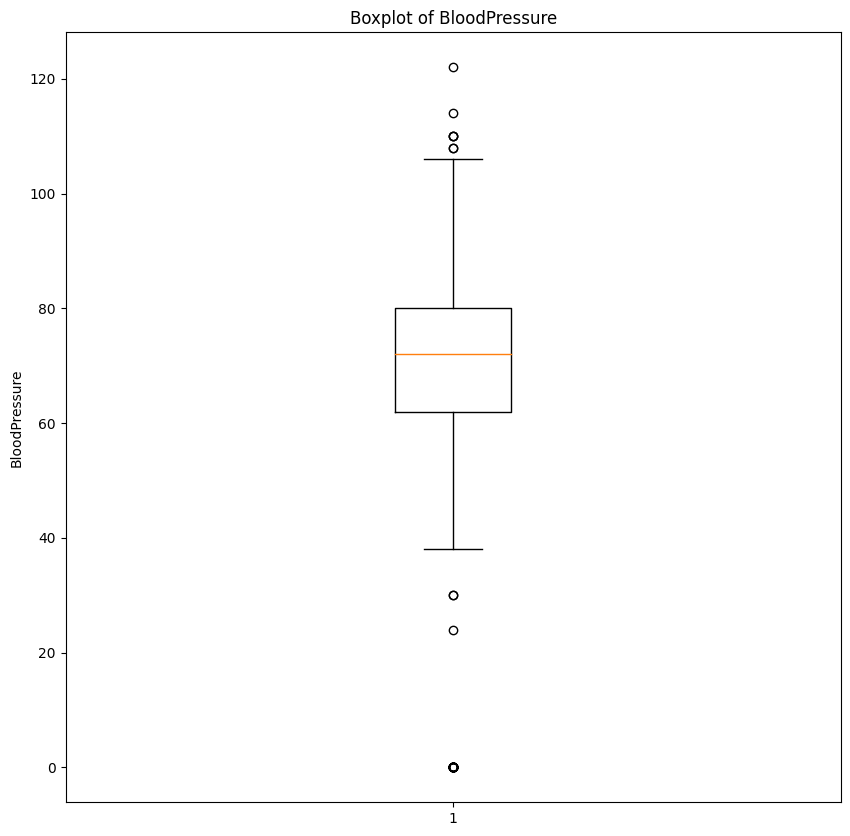

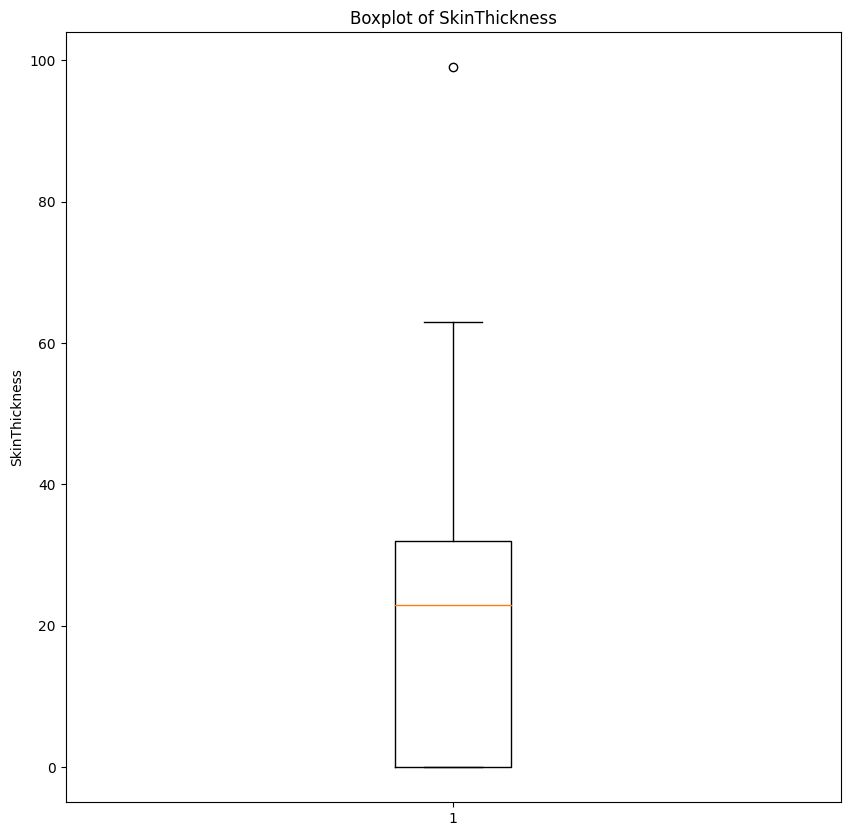

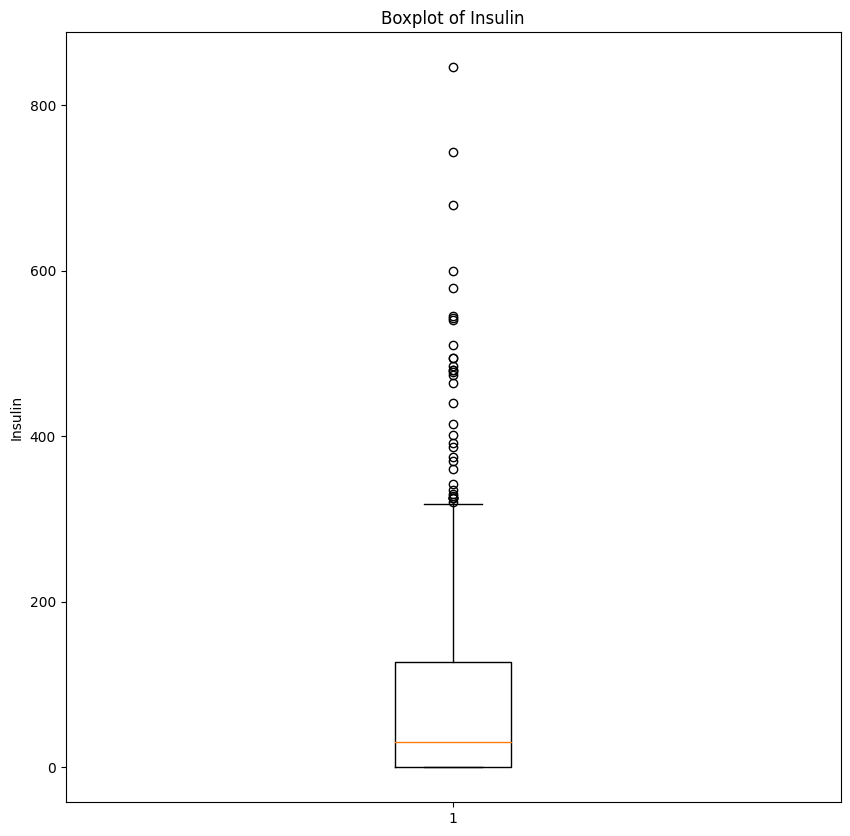

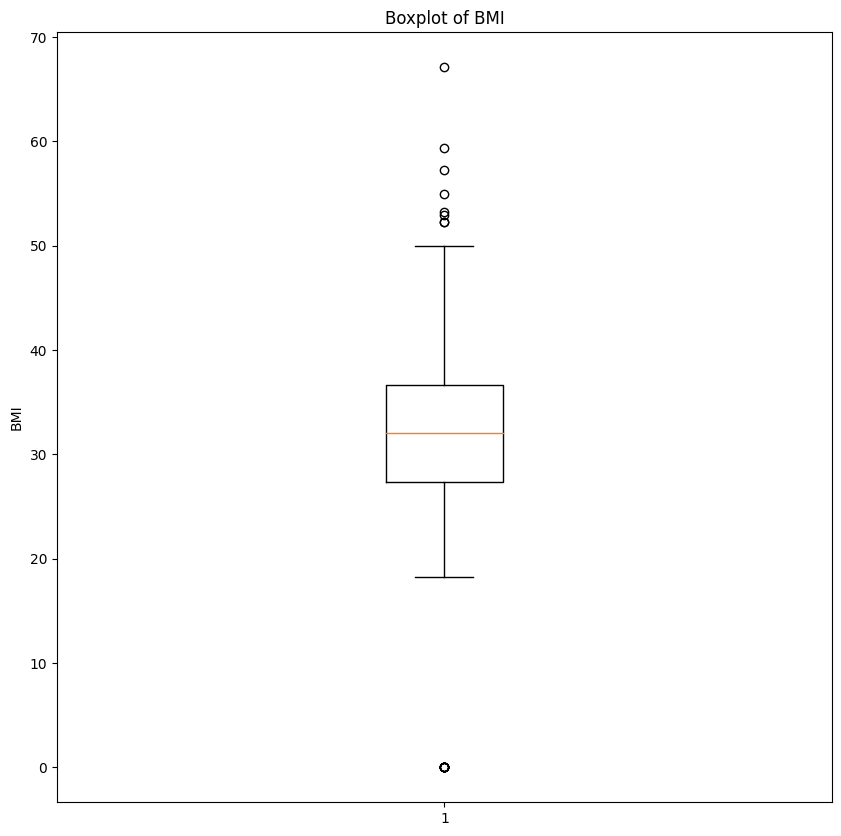

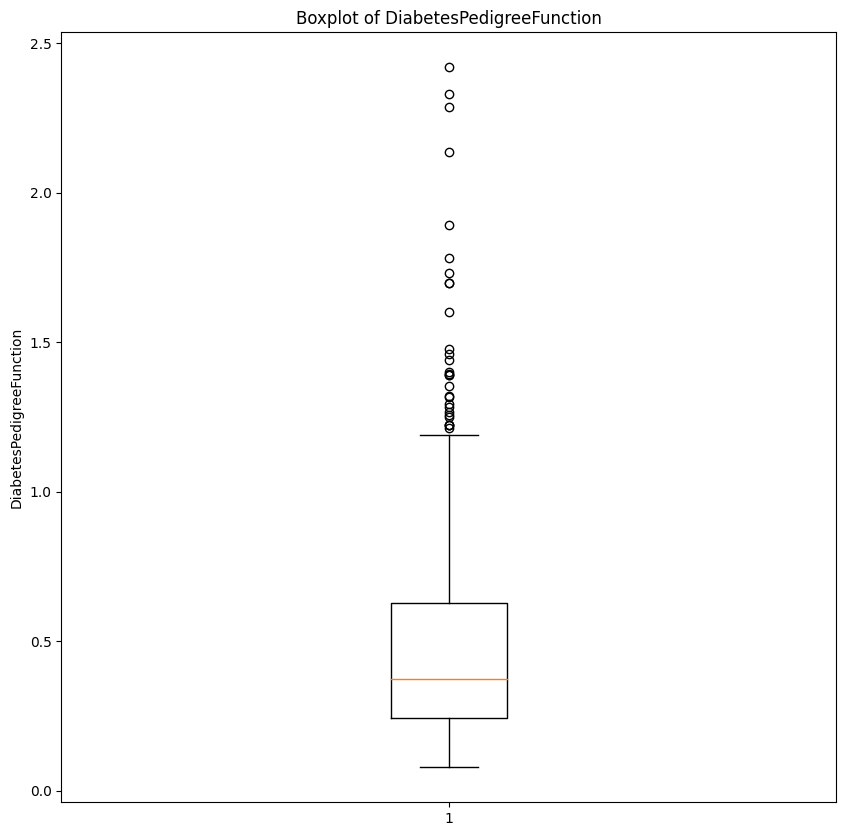

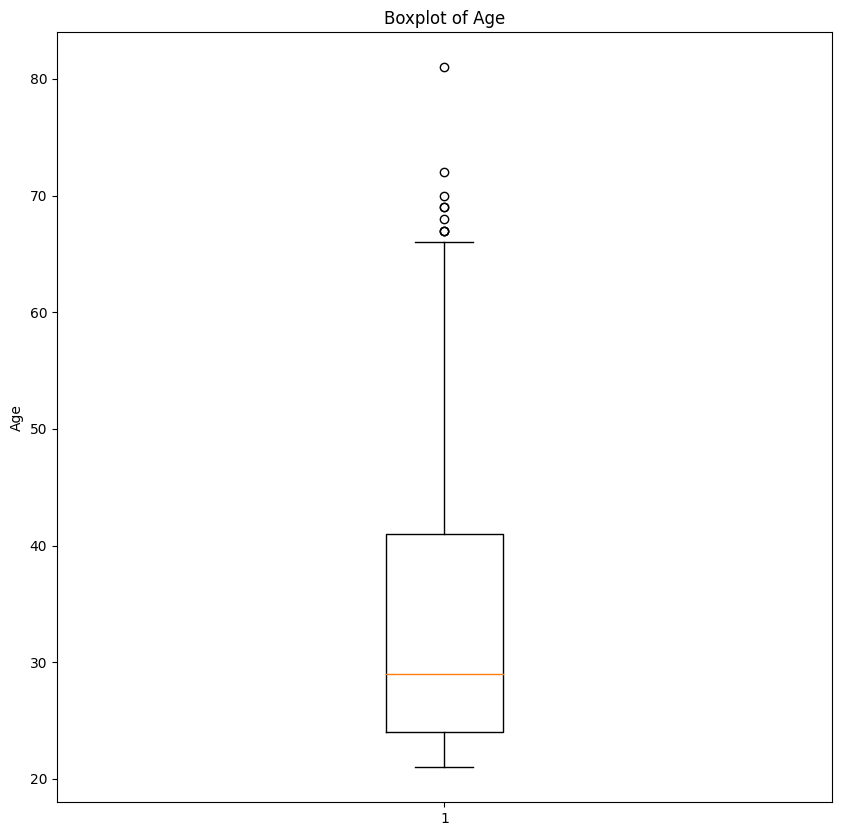

In [ ]:
column2 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col2 in column2:
  plt.boxplot(df2[col2])
  plt.title(f"Boxplot of {col2}")
  plt.ylabel(col2)
  plt.show()


###3. Build Primary Model [Logistic Regression}:

Once you have cleaned, transformed and Visualize your data build Logistic Regression Model from Scratch.

In [ ]:
def standardize(x):
  mean1 = np.mean(x)
  std1 = np.std(x)
  return (x - mean1) / std1

In [ ]:
# splitting data into training and test sets

x = df2.drop(df2[['Outcome']], axis=1)
y = df2[['Outcome']].to_numpy()

x = standardize(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
def weightInitialize(n_features):
    w = np.zeros((1, n_features))
    b = 0
    return w,b

In [ ]:
def sigmoid(result):
    result = 1/(1 + np.exp(-result))
    return result

In [ ]:
def model_optimize(w, b, x, y):
    m = x.shape[0]

    # Prediction
    result = sigmoid(np.dot(w,x.T) + b)
    cost = (-1/m)*(np.sum(x.T * np.log(result)) + ((1-y.T) * (np.log(1-result))))

    # Gradient Calculation
    dw = (1/m)*(np.dot(x.T, (result-y.T).T))
    db = (1/m)*(np.sum(result-y.T))

    grads = {
        "dw": dw,
        "db": db
    }

    return grads, cost

In [ ]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']

        w = w - (learning_rate * dw.T)
        b = b - (learning_rate * db)

        if (i % 100 == 0):
            costs.append(cost)

    # final parameters
    coeff = {"w":w, "b":b}
    gradient = {"dw":dw, "db":db}

    return coeff, gradient, costs

In [ ]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [ ]:
import numpy as np

def weightInitialize(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w, b

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        # Forward propagation
        A = sigmoid(np.dot(w,X.T) + b)
        cost = -1/X.shape[0] * np.sum(Y.T * np.log(A) + (1 - Y.T) * np.log(1 - A))

        # Backward propagation
        dw = 1/X.shape[0] * np.dot(X.T, (A - Y.T).T)
        db = 1/X.shape[0] * np.sum(A - Y.T)

        # Update parameters
        w = w - learning_rate * dw.T
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)

    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}

    return coeff, gradient, costs

# Assuming you have x_train, x_test, y_train, y_test defined somewhere...

# Get number of features
n_features = x_train.shape[1]
print('Number of Features: {}'.format(n_features))

w, b = weightInitialize(n_features)
# Gradient Descent
coeff, gradient, costs = model_predict(w, b, x_train, y_train.reshape(1,-1), learning_rate=0.0001, no_iterations=10000)
# Final Prediction
w = coeff['w']
b = coeff['b']
print('Optimized weights: {}'.format(w))
print('Optimized intercept: {}'.format(b))

final_train_pred = sigmoid(np.dot(w, x_train.T) + b)
final_test_pred = sigmoid(np.dot(w, x_test.T) + b)


Number of Features: 8
Optimized weights: [[ 0.00906913  0.00019278 -0.0054331  ...  0.00040166  0.00257492
   0.00848275]
 [-0.01701566 -0.00036495  0.0101827  ... -0.0007531  -0.00482827
  -0.01591441]
 [ 0.00906913  0.00019278 -0.0054331  ...  0.00040166  0.00257492
   0.00848275]
 ...
 [-0.01701566 -0.00036495  0.0101827  ... -0.0007531  -0.00482827
  -0.01591441]
 [-0.01701566 -0.00036495  0.0101827  ... -0.0007531  -0.00482827
  -0.01591441]
 [ 0.00906913  0.00019278 -0.0054331  ...  0.00040166  0.00257492
   0.00848275]]
Optimized intercept: -0.6327359086432551


###4. Model Evaluation:

Pick an appropriate evaluation metric to evaluate your model on the test set.

In [ ]:
y_train_pred = predict(final_train_pred, x_train.shape[0])
print('Training Accuracy             : {:.4f}'.format(metrics.accuracy_score(y_train_pred.T, y_train)))

y_test_pred = predict(final_test_pred, x_test.shape[0])
print('Test Accuracy                 : {:.4f}'.format(metrics.accuracy_score(y_test_pred.T, y_test)))

print('Logistic Regression f1-score  : {:.4f}'.format(metrics.f1_score(y_test_pred.T, y_test)))
print('Logistic Regression precision : {:.4f}'.format(metrics.precision_score(y_test_pred.T, y_test)))
print('Logistic Regression recall    : {:.4f}'.format(metrics.recall_score(y_test_pred.T, y_test)))
print("\n",metrics.classification_report(y_test_pred.T, y_test))

Training Accuracy             : 0.6531
Test Accuracy                 : 0.6429
Logistic Regression f1-score  : 0.0000
Logistic Regression precision : 0.0000
Logistic Regression recall    : 0.0000

               precision    recall  f1-score   support

         0.0       1.00      0.64      0.78       154
         1.0       0.00      0.00      0.00         0

    accuracy                           0.64       154
   macro avg       0.50      0.32      0.39       154
weighted avg       1.00      0.64      0.78       154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Reca

<Axes: >

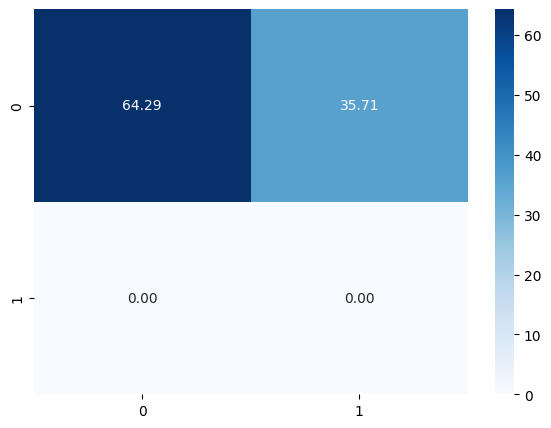

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test_pred.T, y_test)
plt.rcParams['figure.figsize'] = (7.0, 5.0)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

###5. Dimensionality Reduction:

Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced features,evaluate the model and Compare the output with the evaluation fr

In [ ]:
# Create a PCA object
pca = PCA(n_components=5)

# Fit the PCA model to the input data
pca.fit(x)

# Transform the input data to the first two principal components
x_pca = pca.transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)


In [ ]:
# Get number of features
n_features = x_train.shape[1]
print('Number of Features: {}'.format(n_features))

w, b = weightInitialize(n_features)
# Gradient Descent
coeff, gradient, costs = model_predict(w, b, x_train, y_train.reshape(-1,1), learning_rate=0.00001,no_iterations=10000)
# Final Prediction
w = coeff['w']
b = coeff['b']
print('Optimized weights: {}'.format(w))
print('Optimized intercept: {}'.format(b))

final_train_pred = sigmoid(np.dot(w,x_train.T)+b)
final_test_pred = sigmoid(np.dot(w,x_test.T)+b)


Number of Features: 5
Optimized weights: [[ 0.02509446  0.01398677  0.00819225 -0.00134043  0.00636371]]
Optimized intercept: -0.015113716306337104


In [ ]:
y_train_pred = predict(final_train_pred, x_train.shape[0])
print('Training Accuracy             : {:.4f}'.format(metrics.accuracy_score(y_train_pred.T, y_train)))

y_test_pred = predict(final_test_pred, x_test.shape[0])
print('Test Accuracy                 : {:.4f}'.format(metrics.accuracy_score(y_test_pred.T, y_test)))
print('Logistic Regression f1-score  : {:.4f}'.format(metrics.f1_score(y_test_pred.T, y_test)))
print('Logistic Regression precision : {:.4f}'.format(metrics.precision_score(y_test_pred.T, y_test)))
print('Logistic Regression recall    : {:.4f}'.format(metrics.recall_score(y_test_pred.T, y_test)))
print("\n",metrics.classification_report(y_test_pred.T, y_test))

Training Accuracy             : 0.7492
Test Accuracy                 : 0.7143
Logistic Regression f1-score  : 0.6140
Logistic Regression precision : 0.6364
Logistic Regression recall    : 0.5932

               precision    recall  f1-score   support

         0.0       0.76      0.79      0.77        95
         1.0       0.64      0.59      0.61        59

    accuracy                           0.71       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



<Axes: >

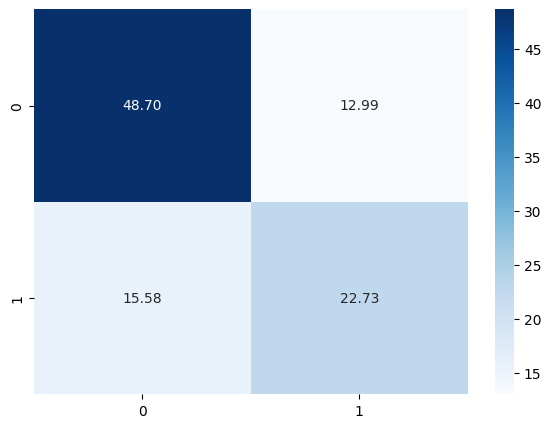

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test_pred.T, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

###6. Conclusion:

Conclude the result of the comparison.


The use of PCA as a preprocessing step has a negligible effect on the performance of the logistic regression model, although it may still be supportive in some circumstances where dimensionality reduction is required. PCA's usage or non-use would ultimately depend on the particular issue at hand and the trade-off between model performance and computational complexity.